# **Simple Convolutional Neural Network:  Fashion MNIST Classification**

IE7860

Assignment 6

Priyanka Patil

## *Introduction*

The goal is to build a convolutional neural network.  Fashion-MNIST data was chosen for this model for few reason.  First, it will provide the fundamentals in building a convolutional neural network.  Second, it is a more challenging dataset than the commonly used MNIST.

## *Dataset*

The fashion_mnist data: 60,000 train and 10,000 test data with 10 categories. Each gray-scale image is 28x28.


Label Description:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

Each gray-scale image is 28x28

In [1]:
!pip install -q -U tensorflow>=1.8.0

In [3]:
from keras.models import load_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'Greys' #sets image to grey
img_rows, img_cols = 28, 28


In [4]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## *Visualize the data*

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 8 Bag


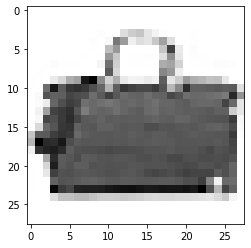

In [5]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 99
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## *Data normalization*
Normalize the data dimensions so that they are of approximately the same scale.

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
print("Number of train data: " + str(len(x_train)))
print("Number of test data: " + str(len(x_test)))

Number of train data: 60000
Number of test data: 10000


## *Split the data into train/validation/test data sets*


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.


In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## *Create the model architecture*

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Sequential model API. 

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

In [9]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

## *Compile the model*
Configuring the learning process with compile() API before training the model will receive three arguments:

1. An optimizer
2. A loss function
3. A list of metrics

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## *Train the model*

The fit() API will be used to train the model

The [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.

In [11]:
from keras.callbacks import ModelCheckpoint


checkpointer = tf.compat.v1.keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpointer])

Epoch 1/10
860/860 [==============================] - 43s 50ms/step - loss: 0.8098 - accuracy: 0.7020 - val_loss: 0.3795 - val_accuracy: 0.8630

Epoch 00001: val_loss improved from inf to 0.37949, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 42s 49ms/step - loss: 0.4223 - accuracy: 0.8460 - val_loss: 0.3108 - val_accuracy: 0.8874

Epoch 00002: val_loss improved from 0.37949 to 0.31077, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 47s 54ms/step - loss: 0.3650 - accuracy: 0.8655 - val_loss: 0.2933 - val_accuracy: 0.8990

Epoch 00003: val_loss improved from 0.31077 to 0.29327, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 42s 49ms/step - loss: 0.3424 - accuracy: 0.8745 - val_loss: 0.2652 - val_accuracy: 0.9018

Epoch 00004: val_loss improved from 0.29327 to 0.26522, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [====================

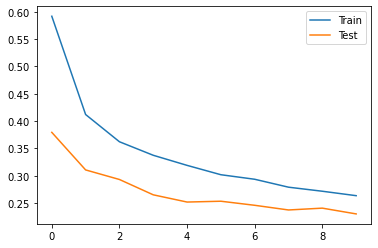

In [12]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

## *Load Model with the best validation accuracy*

In [13]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## *Test Accuracy*

In [14]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9121000170707703


## *Visualize prediction*
The visualization of the prediction will be done by using the model that was just trained. First, the predictions are gathered with the model from the test data. Then 15 images from the test data set will be printed out , and set the titles with the prediction and the true label will be in parantheses. If the prediction matches the true label, then title will be green; otherwise, it's displayed in red.

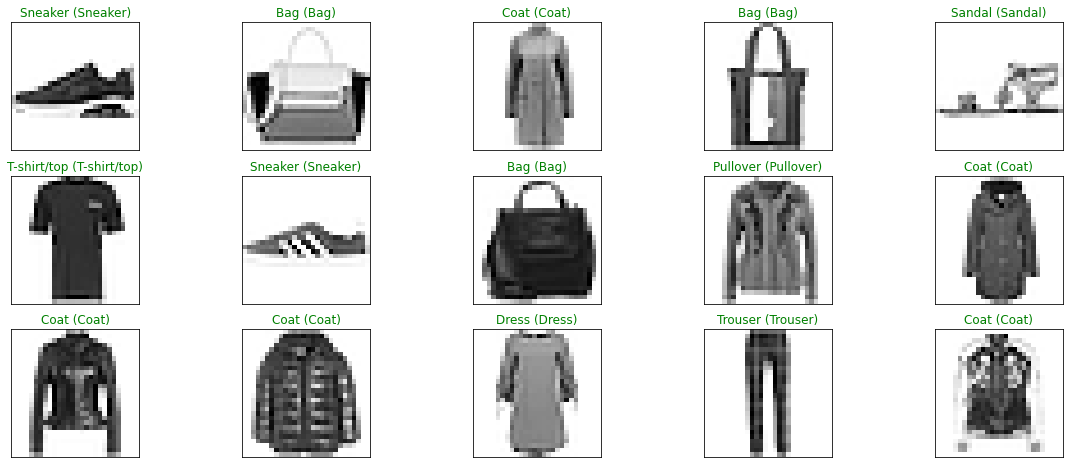

In [15]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## *Conclusion*

The CNN model was successfully trained to classify fashion-MNIST with approximately 91% accuracy.